Problem Statement:

A retail business wants to predict future sales so it can plan inventory, manage staff, and avoid losses due to overstocking or understocking.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

General Descreption about data

In [3]:
df=pd.read_csv('../data/dataset.csv',encoding="latin1")
df.sample(3).T

,2095,9515,359
Row ID,2096,9516,360
Order ID,US-2016-146570,CA-2014-154165,CA-2017-155698
Order Date,5/15/2016,2/17/2014,3/8/2017
Ship Date,5/20/2016,2/24/2014,3/11/2017
Ship Mode,Standard Class,Standard Class,First Class
Customer ID,SN-20710,DL-13315,VB-21745
Customer Name,Steve Nguyen,Delfina Latchford,Victoria Brennan
Segment,Home Office,Consumer,Corporate
Country,United States,United States,United States
City,Jackson,Chicago,Columbus


In [4]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [5]:
df = df.convert_dtypes()

df['Order Date']=pd.to_datetime(df['Order Date'])
df['Order_Year']=df['Order Date'].dt.year
df['Order_Month']=df['Order Date'].dt.month
df['Order_Day']=df['Order Date'].dt.day

df['Ship Date']=pd.to_datetime(df['Ship Date'])
df['Ship_Year']=df['Ship Date'].dt.year
df['Ship_Month']=df['Ship Date'].dt.month
df['Ship_Day']=df['Ship Date'].dt.day


df.drop(columns=['Order Date','Ship Date'],inplace=True,axis=1)

df.to_csv('../data/cleaned_salesdata.csv')
print(df.shape)
df.info()

(9994, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   Int64  
 1   Order ID       9994 non-null   string 
 2   Ship Mode      9994 non-null   string 
 3   Customer ID    9994 non-null   string 
 4   Customer Name  9994 non-null   string 
 5   Segment        9994 non-null   string 
 6   Country        9994 non-null   string 
 7   City           9994 non-null   string 
 8   State          9994 non-null   string 
 9   Postal Code    9994 non-null   Int64  
 10  Region         9994 non-null   string 
 11  Product ID     9994 non-null   string 
 12  Category       9994 non-null   string 
 13  Sub-Category   9994 non-null   string 
 14  Product Name   9994 non-null   string 
 15  Sales          9994 non-null   Float64
 16  Quantity       9994 non-null   Int64  
 17  Discount       9994 non-null   Float64
 1

In [6]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Order_Year,Order_Month,Order_Day,Ship_Year,Ship_Month,Ship_Day
count,9994.0,9994.0,9994.0,9994.0,9994.0,9994.0,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.5,55190.379428,229.858001,3.789574,0.156203,28.656896,2015.722233,7.809686,15.468481,2015.737442,7.743146,15.883730
std,2885.163629,32063.69335,623.245101,2.22511,0.206452,234.260108,1.123555,3.284654,8.748327,1.126141,3.340476,8.802677
min,1.0,1040.0,0.444,1.0,0.0,-6599.978,2014.000000,1.000000,1.000000,2014.000000,1.000000,1.000000
25%,2499.25,23223.0,17.28,2.0,0.0,1.72875,2015.000000,5.000000,8.000000,2015.000000,5.000000,8.000000
50%,4997.5,56430.5,54.49,3.0,0.2,8.6665,2016.000000,9.000000,15.000000,2016.000000,9.000000,16.000000
75%,7495.75,90008.0,209.94,5.0,0.2,29.364,2017.000000,11.000000,23.000000,2017.000000,11.000000,24.000000
max,9994.0,99301.0,22638.48,14.0,0.8,8399.976,2017.000000,12.000000,31.000000,2018.000000,12.000000,31.000000


Get Unique value Of all Categorical values

In [7]:
cat=df.drop(columns=['Order ID','Product ID','Sales','Row ID','Postal Code','Quantity','Discount','Profit','Customer Name','Customer ID'],axis=1)
for i in cat:
    print(f'{i} : {df[i].unique()}')

Ship Mode : <StringArray>
['Second Class', 'Standard Class', 'First Class', 'Same Day']
Length: 4, dtype: string
Segment : <StringArray>
['Consumer', 'Corporate', 'Home Office']
Length: 3, dtype: string
Country : <StringArray>
['United States']
Length: 1, dtype: string
City : <StringArray>
[        'Henderson',       'Los Angeles',   'Fort Lauderdale',
           'Concord',           'Seattle',        'Fort Worth',
           'Madison',       'West Jordan',     'San Francisco',
           'Fremont',
 ...
        'Hagerstown',       'East Orange', 'Arlington Heights',
            'Oswego',       'Coon Rapids',      'San Clemente',
   'San Luis Obispo',        'Springdale',              'Lodi',
             'Mason']
Length: 531, dtype: string
State : <StringArray>
[            'Kentucky',           'California',              'Florida',
       'North Carolina',           'Washington',                'Texas',
            'Wisconsin',                 'Utah',             'Nebraska',
        

In [8]:
ls=df['Product Name'].values
for i in ls :
 print(i)

Bush Somerset Collection Bookcase
Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back
Self-Adhesive Address Labels for Typewriters by Universal
Bretford CR4500 Series Slim Rectangular Table
Eldon Fold 'N Roll Cart System
Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood
Newell 322
Mitel 5320 IP Phone VoIP phone
DXL Angle-View Binders with Locking Rings by Samsill
Belkin F5C206VTEL 6 Outlet Surge
Chromcraft Rectangular Conference Tables
Konftel 250 Conference phone - Charcoal black
Xerox 1967
Fellowes PB200 Plastic Comb Binding Machine
Holmes Replacement Filter for HEPA Air Cleaner, Very Large Room, HEPA Filter
Storex DuraTech Recycled Plastic Frosted Binders
Stur-D-Stor Shelving, Vertical 5-Shelf: 72"H x 36"W x 18 1/2"D
Fellowes Super Stor/Drawer
Newell 341
Cisco SPA 501G IP Phone
Wilson Jones Hanging View Binder, White, 1"
Newell 318
Acco Six-Outlet Power Strip, 4' Cord Length
Global Deluxe Stacking Chair, Gray
Bretford CR4500 Series Slim Rectangular Table
Wilso

In [9]:
df.sample(3).T

,2912,6735,9174
Row ID,2913,6736,9175
Order ID,CA-2014-113929,CA-2016-123358,CA-2017-119424
Ship Mode,Standard Class,Standard Class,Second Class
Customer ID,CK-12205,BT-11680,SB-20185
Customer Name,Chloris Kastensmidt,Brian Thompson,Sarah Brown
Segment,Consumer,Consumer,Consumer
Country,United States,United States,United States
City,Hempstead,San Francisco,Kent
State,New York,California,Washington
Postal Code,11550,94122,98031


Feateres Engineering For Prediction Sales

In [10]:
df.columns

Index(['Row ID', 'Order ID', 'Ship Mode', 'Customer ID', 'Customer Name',
       'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region',
       'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Order_Year', 'Order_Month',
       'Order_Day', 'Ship_Year', 'Ship_Month', 'Ship_Day'],
      dtype='object')

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [12]:
X = df[['Order_Year', 'Order_Month','Order_Day']]
y = df['Sales']

x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=43,test_size=0.2)

model=RandomForestRegressor(n_estimators=100,random_state=43)

model.fit(x_train,y_train)
pred=model.predict(x_test)

y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)



In [13]:
print("Train MAE:", mean_absolute_error(y_train, y_train_pred))
print("Test MAE:", mean_absolute_error(y_test, y_test_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train MAE: 256.04755491997315
Test MAE: 279.2159552107318
Test RMSE: 550.6022522069446


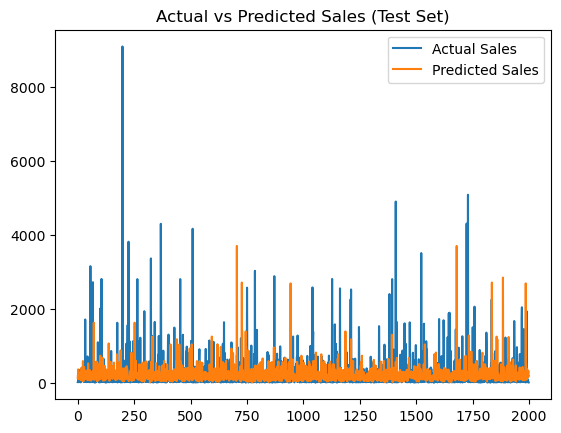

In [14]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(y_test.values, label="Actual Sales")
plt.plot(pred, label="Predicted Sales")
plt.legend()
plt.title("Actual vs Predicted Sales (Test Set)")
plt.show()


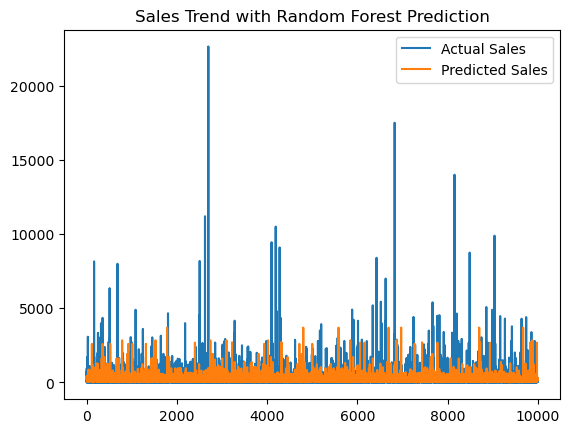

In [15]:
plt.figure()
plt.plot(y.values, label="Actual Sales")
plt.plot(
    list(range(len(y_train))) + list(range(len(y_train), len(y))),
    np.concatenate([y_train_pred, y_test_pred]),
    label="Predicted Sales"
)
plt.legend()
plt.title("Sales Trend with Random Forest Prediction")
plt.show()


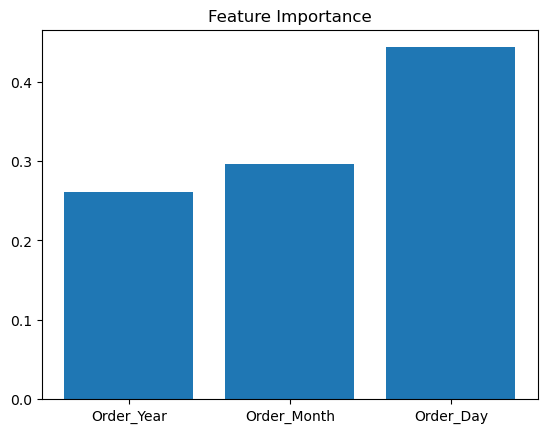

In [16]:
plt.figure()
plt.bar(X.columns, model.feature_importances_)
plt.title("Feature Importance")
plt.show()


In [19]:
import joblib

joblib.dump(model,'../model/sales_predict.pkl')


['../model/sales_predict.pkl']

In [20]:
model=joblib.load('../model/sales_predict.pkl')
date=[[2015,10,26]]
sales=model.predict(date)
print(f'Total sales at {date} is : {round(sales[0],2)} $ ')

Total sales at [[2015, 10, 26]] is : 217.41 $ 


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [21]:
import pandas as pd
import matplotlib.pyplot as plt

last_date = pd.to_datetime(
    df[['Order_Year', 'Order_Month', 'Order_Day']].rename(
        columns={'Order_Year':'year','Order_Month':'month','Order_Day':'day'}
    )
).max()


In [22]:
future_dates = pd.date_range(
    start=last_date + pd.DateOffset(months=1),
    periods=6,
    freq='MS'
)

future_df = pd.DataFrame({
    'Order_Year': future_dates.year,
    'Order_Month': future_dates.month,
    'Order_Day': future_dates.day
})


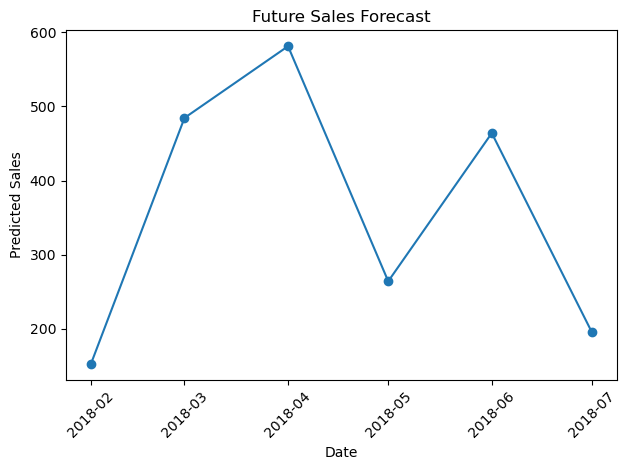

In [23]:
future_sales = model.predict(future_df)
plt.figure()
plt.plot(future_dates, future_sales, marker='o')
plt.title("Future Sales Forecast")
plt.xlabel("Date")
plt.ylabel("Predicted Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
